In [ ]:
from tqdm import tqdm
import random
import torch
from transformers import pipeline
import pandas as pd

# Define hierarchical mapping
sentiment_mapping = {
    "negative": ["sadness", "anger", "fear"]
}

# Load FLAN-T5 model for text generation with pipeline
generator = pipeline("text2text-generation", model="google/flan-t5-large", device=0 if torch.cuda.is_available() else -1)

# Set batch size
batch_size = 10
samples_per_fine_label = 1000

# Generate the dataset for each fine label
negative_data = []

# Generate for each fine label in the sentiment mapping
for overall in sentiment_mapping:
    fine_options = sentiment_mapping[overall]

    # For each fine sentiment under the overall sentiment category
    for fine in fine_options:
        print(f"Generating for {fine} sentiment under overall {overall}")

        for _ in tqdm(range(samples_per_fine_label // batch_size), desc=f"Generating for '{fine}'", ncols=100):
            # Generate the prompt based on fine sentiment
            prompt = f"Generate a social media post/tweet that expresses {fine} emotion with an overall {overall} sentiment."

            # Generate a batch of synthetic samples for the fine-grained label
            batch_data = []
            for _ in range(batch_size):
                response = generator(prompt,
                                     max_length=140,
                                     min_length=100,
                                     do_sample=True,
                                     top_k=50)[0]['generated_text']
                batch_data.append({
                    "text": response,
                    "overall_sentiment": overall,
                    "fine_grained_sentiment": fine
                })

            # Append batch data to the synthetic data list
            negative_data.extend(batch_data)

# Create a DataFrame from the generated synthetic data
negative_df = pd.DataFrame(negative_data)

# Save to CSV (optional)
# synthetic_df.to_csv("synthetic_data.csv", index=False)

# Display the generated dataframe
negative_df.head()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Device set to use cuda:0


Generating for sadness sentiment under overall negative


Generating for 'sadness': 100%|█████████████████████████████████| 100/100 [1:08:27<00:00, 41.07s/it]


Generating for anger sentiment under overall negative


Generating for 'anger': 100%|███████████████████████████████████| 100/100 [1:07:34<00:00, 40.54s/it]


Generating for fear sentiment under overall negative


Generating for 'fear': 100%|████████████████████████████████████| 100/100 [1:08:29<00:00, 41.10s/it]


text overall_sentiment  \
0  #justinhopes - I'm so sad it's Monday already!...          negative   
1  @dalanaeduard you lost a lot of friends!! so s...          negative   
2  @DreamySawyers yeah my poor cat yay! my fave s...          negative   
3  @milfefe u are not all the best at this, but y...          negative   
4  Good Morning everyone! I'm still not feeling t...          negative   

  fine_grained_sentiment  
0                sadness  
1                sadness  
2                sadness  
3                sadness  
4                sadness

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
negative_df.to_csv("/content/drive/MyDrive/Mini Project/Generated/negative_data.csv", index=False)

##merge the generated datasets into single one

In [ ]:
neutral_df = pd.read_csv("/content/drive/MyDrive/Mini Project/Generated/neutral_data.csv")

In [ ]:
old_df = pd.read_csv("/content/drive/MyDrive/Mini Project/Generated/synthetic_dataset_from_stratified_sampled.csv")

In [ ]:
import pandas as pd

# Concatenate the new separate sentiment datasets
new_df = pd.concat([neutral_df, negative_df], ignore_index=True)

# Combine old and new datasets
combined_df = pd.concat([old_df, new_df], ignore_index=True)

# Drop duplicate texts (keeping the first occurrence)
combined_df = combined_df.drop_duplicates(subset=["text"]).reset_index(drop=True)

# Optional: Check final counts
print("Final record count:", len(combined_df))
print(combined_df["overall_sentiment"].value_counts())


Final record count: 5800
overall_sentiment
negative    3700
neutral     1400
positive     700
Name: count, dtype: int64


In [ ]:
combined_df.to_csv("/content/drive/MyDrive/Mini Project/Generated/combined_synthetic_sentiment_data.csv", index=False)


NameError: name 'combined_df' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load your synthetic dataset
df_syn = pd.read_csv("/content/drive/MyDrive/Mini Project/Generated/combined_synthetic_sentiment_data.csv")  # Or however you're loading it




In [ ]:
# Basic overview
print("Shape of dataset:", df_syn.shape)
print("\nColumns:", df_syn.columns.tolist())
print("\nData types:\n", df_syn.dtypes)
print("\nMissing values:\n", df_syn.isnull().sum())
print("\nClass distribution:\n", df_syn['overall_sentiment'].value_counts(normalize=True))



Shape of dataset: (8800, 3)

Columns: ['text', 'overall_sentiment', 'fine_grained_sentiment']

Data types:
 text                      object
overall_sentiment         object
fine_grained_sentiment    object
dtype: object

Missing values:
 text                      0
overall_sentiment         0
fine_grained_sentiment    0
dtype: int64

Class distribution:
 overall_sentiment
positive    0.420455
negative    0.420455
neutral     0.159091
Name: proportion, dtype: float64


<ipython-input-16-62e622862221>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_syn, x='overall_sentiment', order=['positive', 'neutral', 'negative'], palette='viridis')


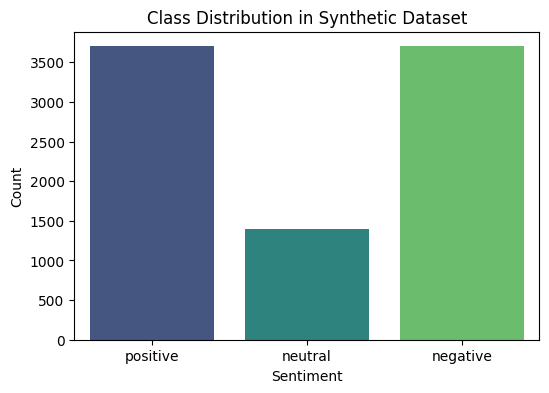

In [ ]:
# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df_syn, x='overall_sentiment', order=['positive', 'neutral', 'negative'], palette='viridis')
plt.title("Class Distribution in Synthetic Dataset")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()



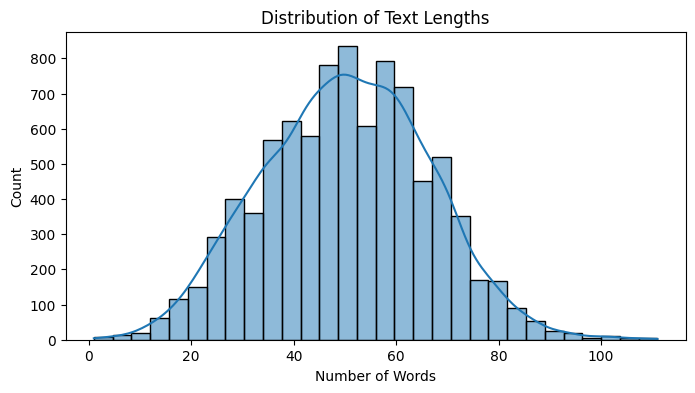

In [ ]:
# Text length distribution
df_syn['text_length'] = df_syn['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,4))
sns.histplot(df_syn['text_length'], bins=30, kde=True)
plt.title("Distribution of Text Lengths")
plt.xlabel("Number of Words")
plt.show()


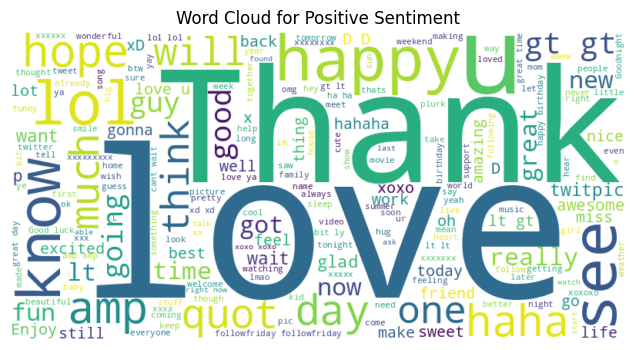

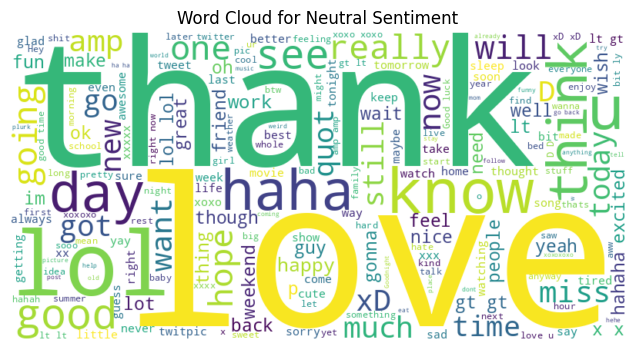

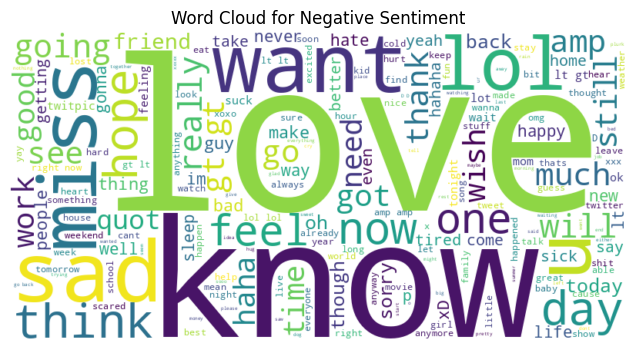

In [ ]:

# Word clouds for each sentiment
for label in ['positive', 'neutral', 'negative']:
    text = ' '.join(df_syn[df_syn['overall_sentiment'] == label]['text'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {label.capitalize()} Sentiment')
    plt.axis('off')
    plt.show()

In [ ]:
df_real = pd.read_csv("/content/drive/MyDrive/Mini Project/Generated/sampled.csv")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Sample assumption:
# df_real and df_syn are your real and synthetic DataFrames respectively
# df_real['overall_sentiment'] contains labels as -1, 0, 1
# df_syn['overall_sentiment'] contains labels as 'negative', 'neutral', 'positive'

# Step 1: Normalize Labels
label_map = {-1: 'negative', 0: 'neutral', 1: 'positive'}
df_real['overall_sentiment'] = df_real['overall_sentiment'].map(label_map)

# Step 2: Add source column
df_real['source'] = 'real'
df_syn['source'] = 'synthetic'

# Step 3: Combine datasets for comparison
df_combined = pd.concat([df_real[['text', 'overall_sentiment', 'source']],
                         df_syn[['text', 'overall_sentiment', 'source']]],
                        ignore_index=True)



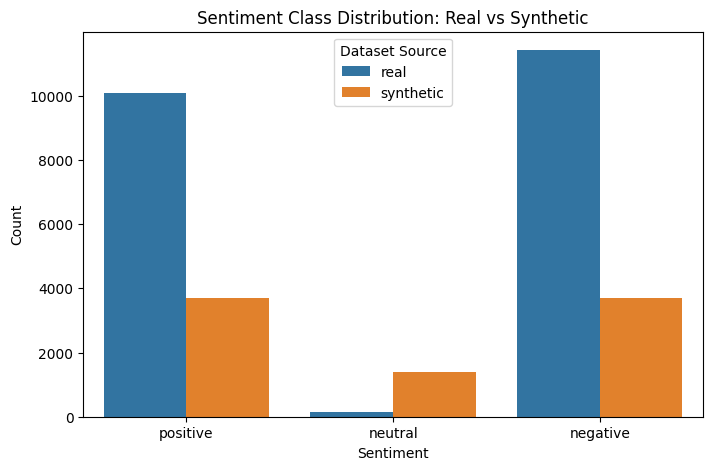

In [ ]:
# Step 4: Class distribution comparison
plt.figure(figsize=(8, 5))
sns.countplot(data=df_combined, x='overall_sentiment', hue='source', order=['positive', 'neutral', 'negative'])
plt.title("Sentiment Class Distribution: Real vs Synthetic")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.legend(title="Dataset Source")
plt.show()




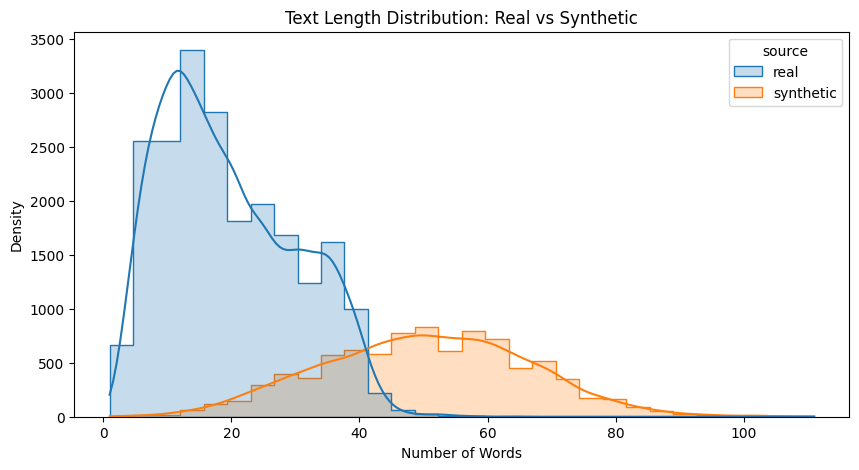

In [ ]:
# Step 5: Text length distribution
df_combined['text_length'] = df_combined['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
sns.histplot(data=df_combined, x='text_length', hue='source', bins=30, kde=True, element='step')
plt.title("Text Length Distribution: Real vs Synthetic")
plt.xlabel("Number of Words")
plt.ylabel("Density")
plt.show()


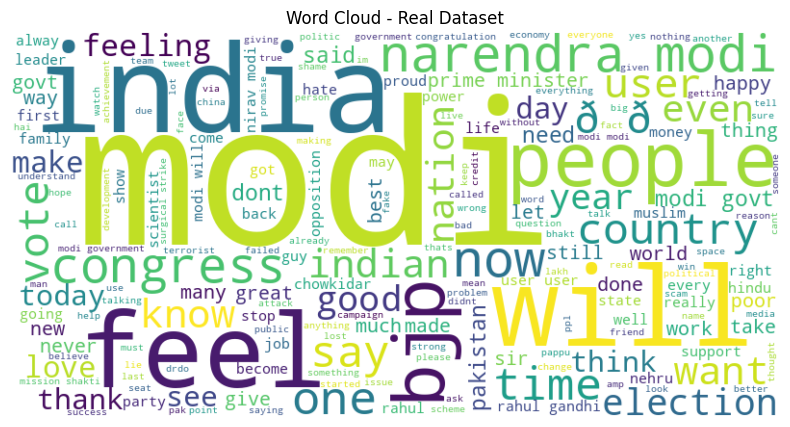

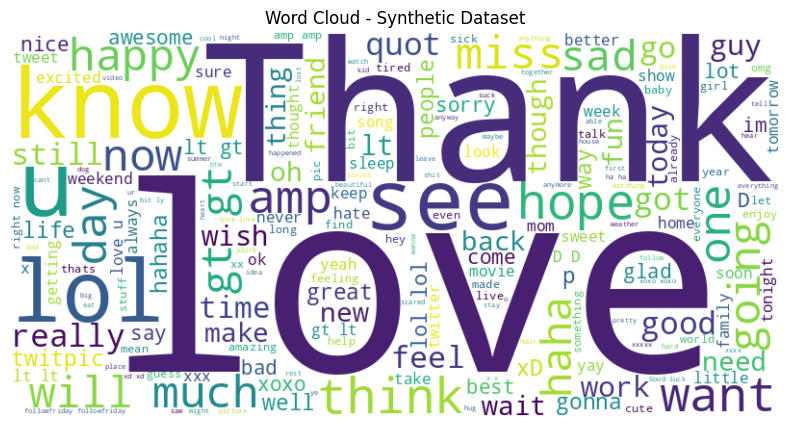

In [ ]:
# Step 6: Word Cloud Comparison
for dataset, title in zip([df_real, df_syn], ['Real', 'Synthetic']):
    text = ' '.join(dataset['text'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud - {title} Dataset')
    plt.axis('off')
    plt.show()


In [ ]:
df_real.head()

text  sentiment_label  \
0  india joins the elite club congratulations all...              1.0   
1  this pure bravery only firing bullets and ches...              1.0   
2  you are true you have guts then the video wher...              1.0   
3  when modi was destroying economy with demoneti...             -1.0   
4                                        excellent                1.0   

   emotion_label  hate_speech_label     source_dataset fine_grained_label  \
0            1.0                0.0  sentiment_dataset             joyful   
1            0.0                0.0  sentiment_dataset         melancholy   
2            1.0                0.0  sentiment_dataset             joyful   
3            1.0                0.0  sentiment_dataset             joyful   
4            1.0                0.0  sentiment_dataset             joyful   

  sentiment_label_text predicted_sentiment_label  \
0             Positive                  Positive   
1             Positive                  Positive   
2             Positive                  Positive   
3             Negative                  Negative   
4             Positive                  Positive   

   bert_predicted_sentiment_label  predicted_sentiment_label_numeric  \
0                               1                                  1   
1                               1                                  1   
2                               1                                  1   
3                              -1                                 -1   
4                               1                                  1   

   final_sentiment final_sentiment_label  \
0                1              Positive   
1                1              Positive   
2                1              Positive   
3               -1              Negative   
4                1              Positive   

                                    validation_flags  \
0                                                NaN   
1  Mismatch: Sentiment should be 'negative' for f...   
2                                                NaN   
3  Mismatch: Sentiment should be 'positive' for f...   
4                                                NaN   

                              final_validation_flags  \
0                                                NaN   
1  Mismatch: Sentiment should be 'negative' for f...   
2                                                NaN   
3  Mismatch: Sentiment should be 'positive' for f...   
4                                                NaN   

                       fine_grained_validation_flags  ensemble_sentiment  \
0  Mismatch: Fine-grained label 'joyful' should h...                   1   
1  Mismatch: Fine-grained label 'melancholy' shou...                   1   
2  Mismatch: Fine-grained label 'joyful' should h...                   1   
3  Mismatch: Fine-grained label 'joyful' should h...                  -1   
4  Mismatch: Fine-grained label 'joyful' should h...                   1   

  overall_sentiment sentiment_str predicted_fine_grained source  
0          positive      positive                    joy   real  
1          positive      positive               surprise   real  
2          positive      positive               surprise   real  
3          negative      negative               surprise   real  
4          positive      positive                    joy   real

In [ ]:
df_syn.head()

text overall_sentiment  \
0  @Jimmy_Knymer, we have not been too good but i...           neutral   
1  @JerzyKrzewczynski http://twitpic.com/7ds6l - ...           neutral   
2  @Miranda_Dawson What did you get them for for ...           neutral   
3  @rukiyuldoshi Ah - good point, my sister is in...           neutral   
4  has become a bit tired and confused from the h...           neutral   

  fine_grained_sentiment  text_length     source  
0                neutral           42  synthetic  
1                neutral           54  synthetic  
2                neutral           58  synthetic  
3                neutral           63  synthetic  
4                neutral           64  synthetic

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Rename columns to standard names for easy comparison
df_real_clean = df_real.rename(columns={'predicted_fine_grained': 'emotion'})
df_syn_clean = df_syn.rename(columns={'fine_grained_sentiment': 'emotion'})

# Add source identifier
df_real_clean['source'] = 'real'
df_syn_clean['source'] = 'synthetic'

# Combine
df_combined = pd.concat([df_real_clean[['text', 'emotion', 'source']],
                         df_syn_clean[['text', 'emotion', 'source']]],
                         ignore_index=True)



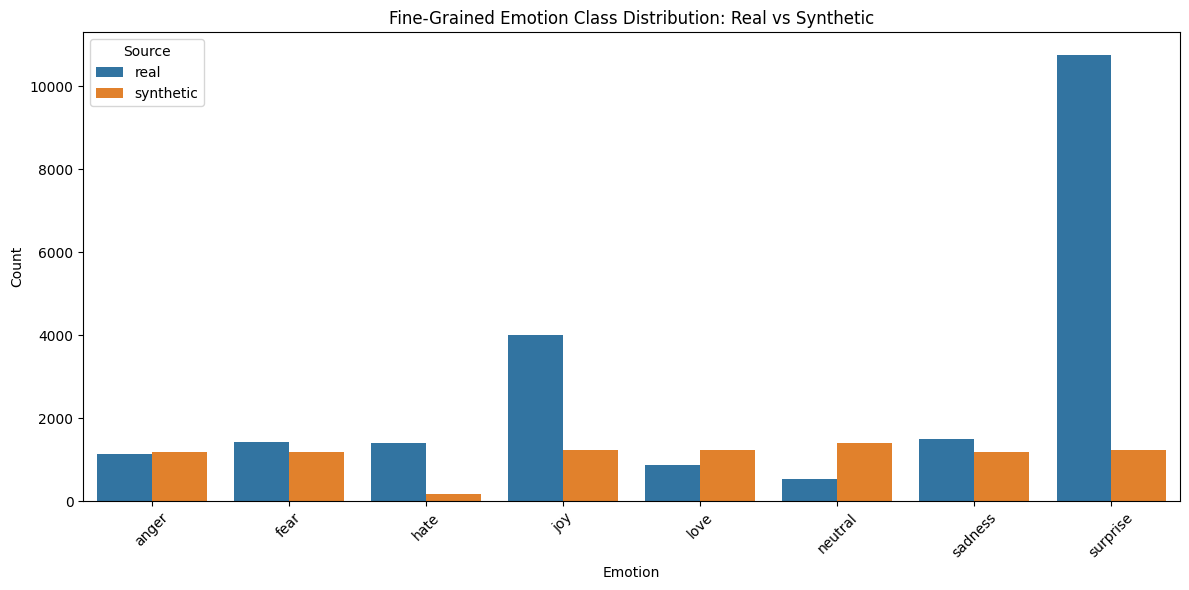

In [ ]:
# 1. Class distribution comparison
plt.figure(figsize=(12, 6))
sns.countplot(data=df_combined, x='emotion', hue='source', order=sorted(df_combined['emotion'].unique()))
plt.title("Fine-Grained Emotion Class Distribution: Real vs Synthetic")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Source")
plt.tight_layout()
plt.show()



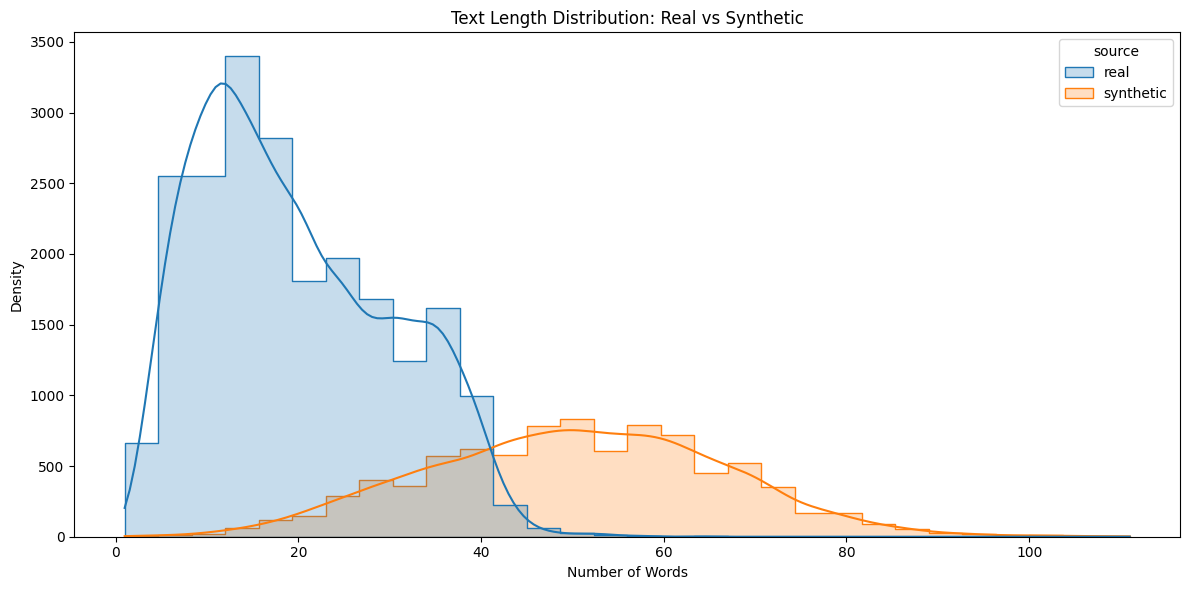

In [ ]:

# 2. Text length distribution
df_combined['text_length'] = df_combined['text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(12, 6))
sns.histplot(data=df_combined, x='text_length', hue='source', bins=30, kde=True, element="step")
plt.title("Text Length Distribution: Real vs Synthetic")
plt.xlabel("Number of Words")
plt.ylabel("Density")
plt.tight_layout()
plt.show()



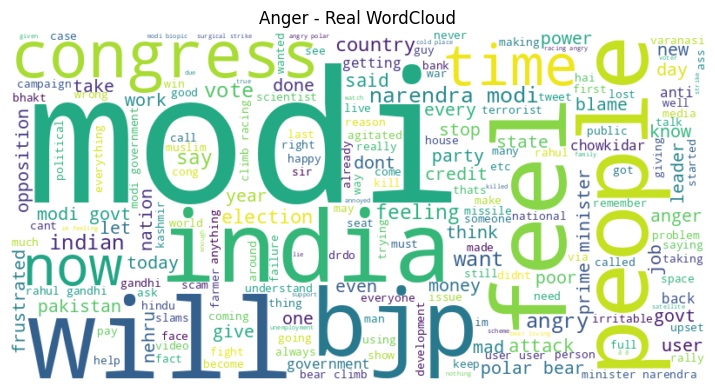

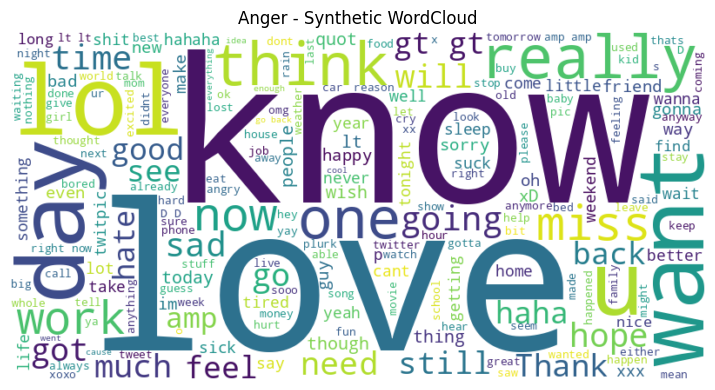

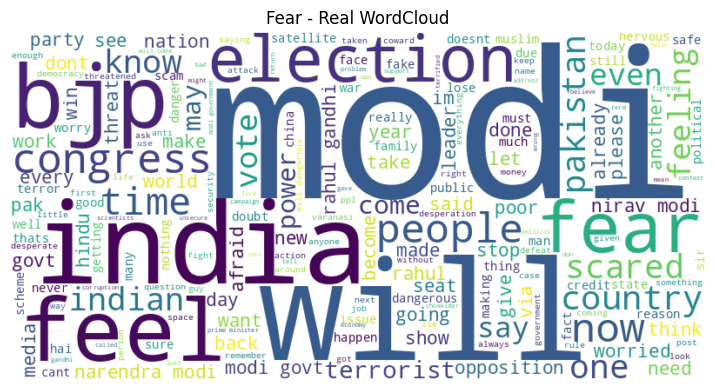

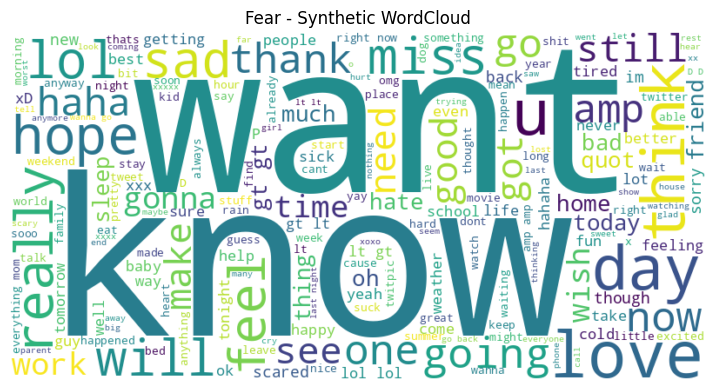

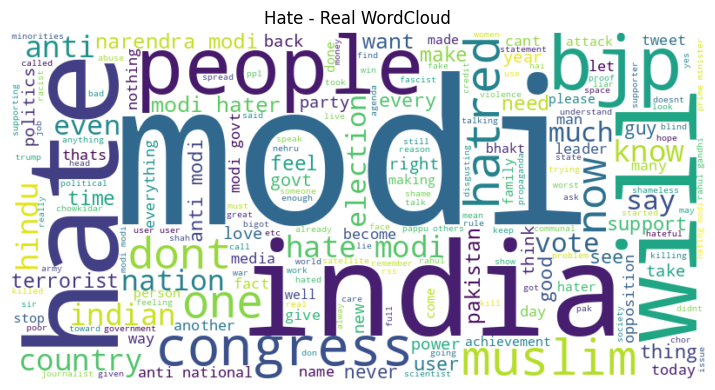

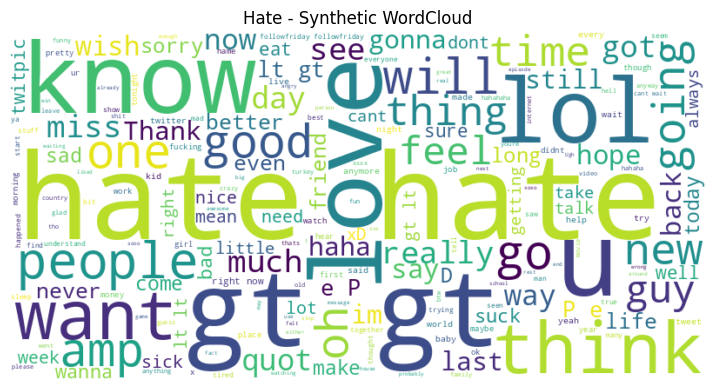

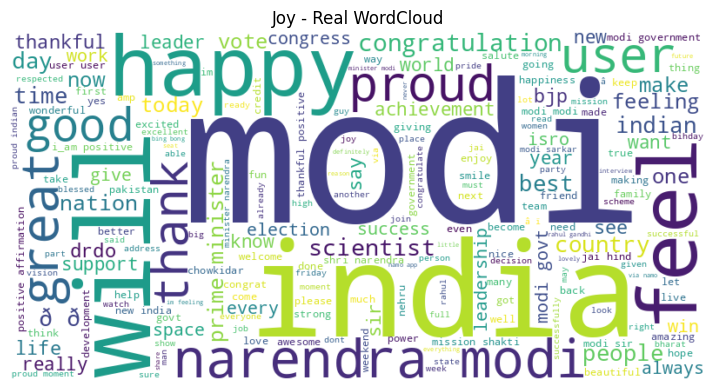

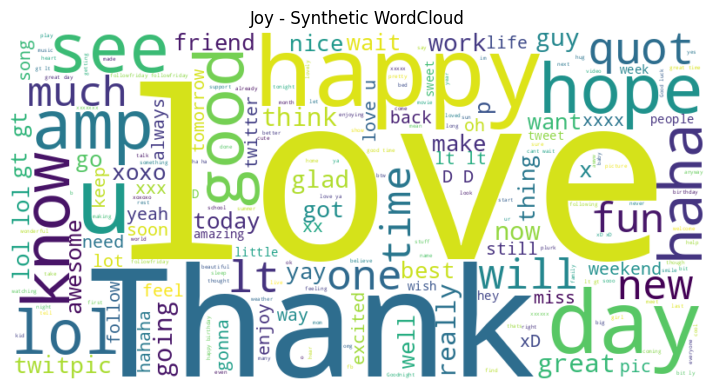

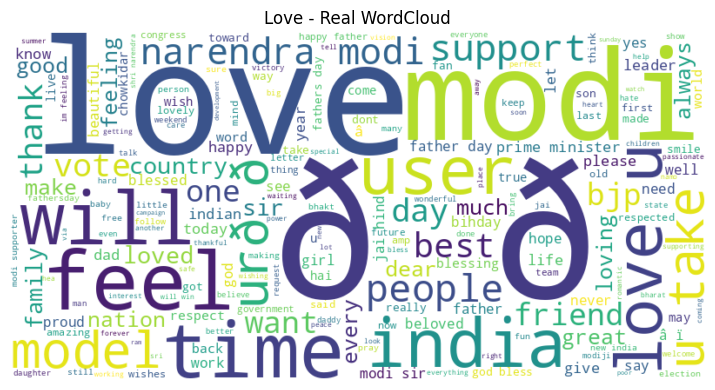

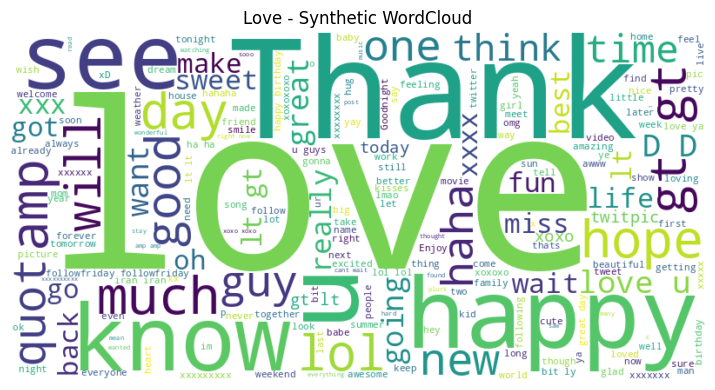

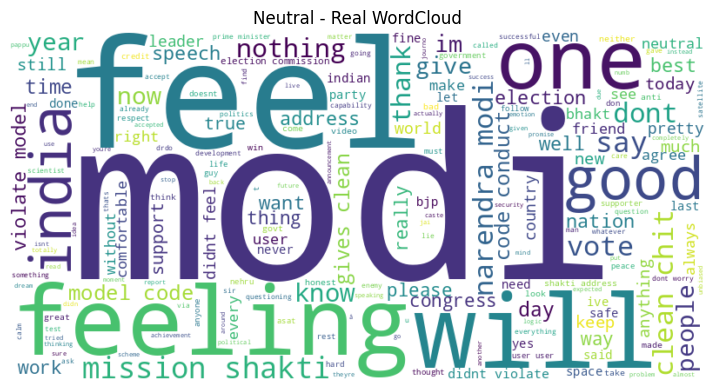

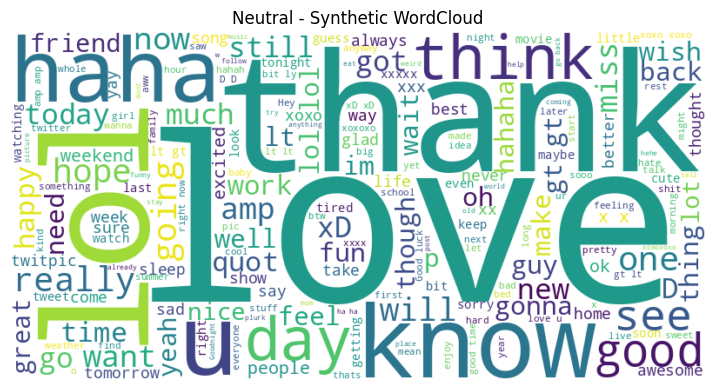

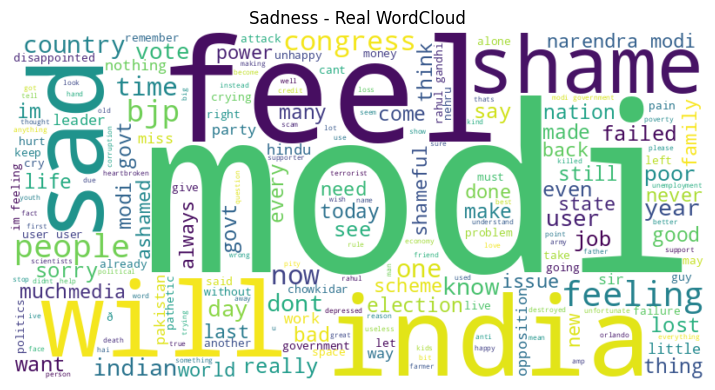

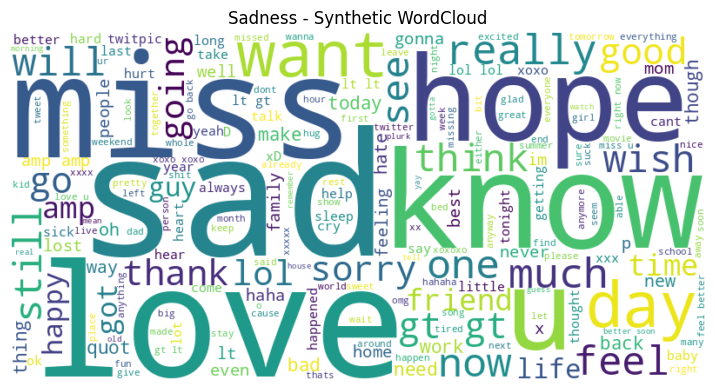

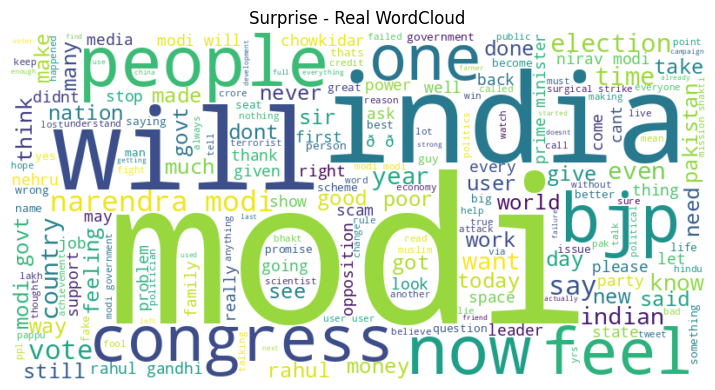

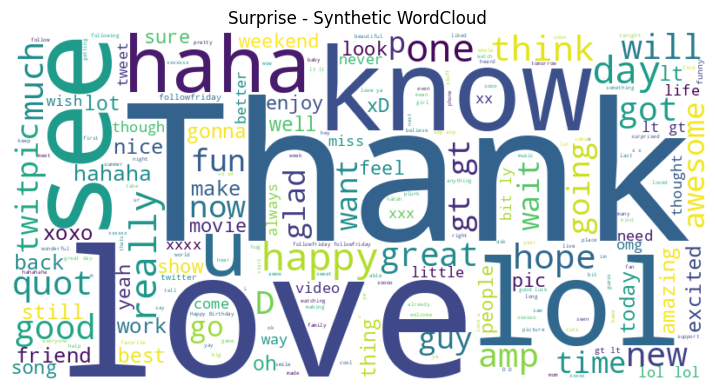

In [ ]:
# 3. WordCloud per emotion per source
for emotion in sorted(df_combined['emotion'].dropna().unique()):
    for src in ['real', 'synthetic']:
        subset = df_combined[(df_combined['emotion'] == emotion) & (df_combined['source'] == src)]
        if not subset.empty:
            text = ' '.join(subset['text'].astype(str))
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
            plt.figure(figsize=(10, 4))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f"{emotion.title()} - {src.title()} WordCloud")
            plt.tight_layout()
            plt.show()